In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'CarPrice_Assignment.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


[]

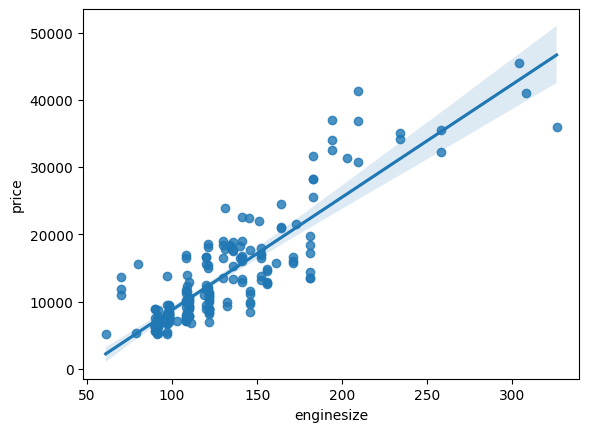

In [5]:
sns.regplot(data=df, x='enginesize', y='price', )
plt.plot()

In [6]:
df = df[['enginesize', 'price']]

In [7]:
df.rename(columns={'enginesize' : 'X', 'price' : 'Y'}, inplace=True)

In [8]:
df.head()

,X,Y
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [9]:
mean_X = df['X'].mean()
mean_Y = df['Y'].mean()

In [10]:
mean_X, mean_Y

(126.90731707317073, 13276.710570731706)

In [11]:
lambda_1 = (lambda a: (a - mean_X))
lambda_2 = (lambda a: (a - mean_Y))
lambda_3 = (lambda a: a**2)

In [12]:
df['X-mean(X)'] = df['X'].apply(lambda_1)
df['X-mean(X)^2'] = df['X-mean(X)'].apply(lambda_3)

In [13]:
df['Y-mean(Y)'] = df['Y'].apply(lambda_2)
df['Y-mean(Y)^2'] = df['Y-mean(Y)'].apply(lambda_3)

In [14]:
df['X-mean(X)*Y-mean(Y)'] = (df['X'] - mean_X)*(df['Y'] - mean_Y)

In [15]:
df.head()

,X,Y,X-mean(X),X-mean(X)^2,Y-mean(Y),Y-mean(Y)^2,X-mean(X)*Y-mean(Y)
0,130,13495.0,3.092683,9.564688,218.289429,4.765027e+04,675.099991
1,130,16500.0,3.092683,9.564688,3223.289429,1.038959e+07,9968.612186
2,152,16500.0,25.092683,629.642736,3223.289429,1.038959e+07,80880.979630
3,109,13950.0,-17.907317,320.672005,673.289429,4.533187e+05,-12056.807292
4,136,17450.0,9.092683,82.676883,4173.289429,1.741634e+07,37946.397542


In [16]:
b1 = df['X-mean(X)*Y-mean(Y)'].sum()/df['X-mean(X)^2'].sum()
b1

167.69841639317212

In [19]:
b0 = mean_Y - (b1 * mean_X)
b0

-8005.4455311452

## Line definition : 
## _y = -8005.45 + 167.7*x_

In [24]:
lambda_4 = (lambda a: b0 + (b1*a))

In [25]:
df['y_pred_man'] = df['X'].apply(lambda_4)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
df

,X,Y,X-mean(X),X-mean(X)^2,Y-mean(Y),Y-mean(Y)^2,X-mean(X)*Y-mean(Y),y_pred_man
0,130,13495.0,3.092683,9.564688,218.289429,4.765027e+04,675.099991,13795.348600
1,130,16500.0,3.092683,9.564688,3223.289429,1.038959e+07,9968.612186,13795.348600
2,152,16500.0,25.092683,629.642736,3223.289429,1.038959e+07,80880.979630,17484.713761
3,109,13950.0,-17.907317,320.672005,673.289429,4.533187e+05,-12056.807292,10273.681856
4,136,17450.0,9.092683,82.676883,4173.289429,1.741634e+07,37946.397542,14801.539098
...,...,...,...,...,...,...,...,...
200,141,16845.0,14.092683,198.603712,3568.289429,1.273269e+07,50286.771518,15640.031180
201,141,19045.0,14.092683,198.603712,5768.289429,3.327316e+07,81290.673957,15640.031180
202,173,21485.0,46.092683,2124.535419,8208.289429,6.737602e+07,378342.082035,21006.380505
203,145,22470.0,18.092683,327.345175,9193.289429,8.451657e+07,166331.270698,16310.824846


In [44]:
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df[['Y']], test_size = 0.25)
 
regr = LinearRegression()
regr.fit(X_train, y_train)
skl_inter = regr.intercept_
skl_coef = regr.coef_

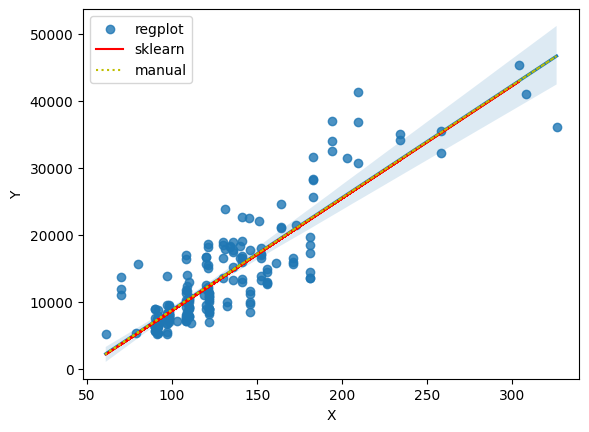

In [89]:
y_pred = regr.predict(X_test)
sns.regplot(x=df['X'], y=df['Y'], label = 'regplot')
plt.plot(X_test, y_pred, color='r', label = 'sklearn')
plt.plot(df['X'], df['y_pred_man'], color='y', linestyle = ':', label = 'manual')
plt.legend()

plt.show()

In [85]:
data = {'Type' : ['Manual', 'Sklearn'],
    'Intercept': [b0,skl_inter[0]],
       'Coeficient' : [b1,skl_coef[0][0]]}

In [86]:
results = pd.DataFrame(data)

In [87]:
results

,Type,Intercept,Coeficient
0,Manual,-8005.445531,167.698416
1,Sklearn,-8110.098448,167.683734
